# Data PreProcessing for Hemingway Next Word Prediction

## Introduction

Preprocessing for NLP will involve here the tokenization and word embeddings using the cleaned text wrangled in the first step. Assessments of ngrams and similarity comparisons will be made here. 

Using *The Sun Also Rises* by Ernest Hemingway, this project will craft a next word prediction NLP object using Google's BERT. The wonderful venture Project Guttenberg (https://www.gutenberg.org/) provides free texts in electronic format. The text for this effort was chosen from Project Guttenberg and cleaned of its leading matter and liscence information.

## Table of Contents <a id="id0"></a>

1. [Import Packages](#id1)
2. [Load the Data](#id2)
3. [Processing on Punctuation for Ngrams](#id3)
8. [Word Embeddings](#id4)

<a id="id1"></a>

[Back to the TOC](#id0)


## Import Packages <a id="id1"></a>

In [52]:
import pandas as pd
import spacy
import spacy_cleaner
from spacy_cleaner.processing import removers, replacers, mutators
from spacy.matcher import Matcher
from nltk import bigrams
from nltk.tokenize import RegexpTokenizer
import nltk, re, string, collections
from nltk.lm import NgramCounter
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import seaborn as sns
from IPython.display import Image

[Back to the TOC](#id0)


## Load the Data <a id="id2"></a>

The novel *The Sun Also Rises* by Ernest Hemingway can be found at Project Gutenberg here in several formats: https://www.gutenberg.org/ebooks/67138 . 

In [53]:
### The Project Gutenberg information and publisher copyright information was removed manually with a text processing program.
### Working from text_clean, the result of the data wrangling
# Loading the dataset
path = 'text_clean.txt'
text = open(path).read()

print('The text has {:,} separate items'.format(len(text)))

The text has 182,924 separate items


[Back to the TOC](#id0)


<a id="id3"></a>
## Processing on Punctuation for Ngrams

In [59]:
### Starting fresh here: Drawing from https://www.kaggle.com/code/scratchpad/notebookdbaabe5532/
# Function n_gram: splits the words in order to given parameter
# Parameter n: it's the "n" number for "n-gram"
def n_gram(n):                                             
    n_grams = ngrams(text.split(), n)
    return n_grams

In [60]:
### Setting up empty lists to store grams and their frequencies
sentences = []
df_frequency = []

In [61]:
# Function frequency: counts the frequency of the each "n-gram" output
# Parameter grammed: it takes the function "n_gram"s return as value. 
def frequency(grammed):
    sentences.clear()
    df_frequency.clear()
    freq = nltk.FreqDist(grammed)
    for k, v in freq.items():
        sentences.append(k)       # Sentences is a list, stores the grams(ignores duplicates)
        df_frequency.append(v)    # df_frequency is a list, stores the frequency of grams
        

In [62]:
# Function create_plot: it creates a plot for given grams
# Parameter num: it's a number to send it to "n_gram" function
def create_plot(num):
    frequency(n_gram(num)) # Send "num" parameter to "n_gram func." and send the result to "frequency func."

    gram_frame = pd.DataFrame(sentences)   # gram_frame is the data frame to store grams and freq.

    gram_frame['frequencies'] = df_frequency
    if num == 2:
        gram_frame.columns = ['first', 'second', 'frequencies']
    if num == 3:
        gram_frame.columns = ['first', 'second', 'third', 'frequencies']

    gram_frame.sort_values("frequencies", axis=0, ascending=False, inplace=True, na_position='last')

    gram_frame = gram_frame.head(20)            # Only take the top 20 of gram_frame

    total = sum(df_frequency)

    gram_frame["ratio"] = gram_frame['frequencies'].div(total)   # Additional, ratio is added

    plt.rcdefaults()
    fig, ax = plt.subplots()

    if num == 2:
        grams = gram_frame["first"] + " " + gram_frame["second"]
    if num == 3:
        grams = gram_frame["first"] + " " + gram_frame["second"] + " " + gram_frame["third"]

    # Create plot
    y_pos = np.arange(len(grams))
    performance = gram_frame["frequencies"]

    ax.barh(y_pos, performance)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(grams)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Frequency')
    ax.set_title('2-3 grams')

    plt.show()
    display(gram_frame)

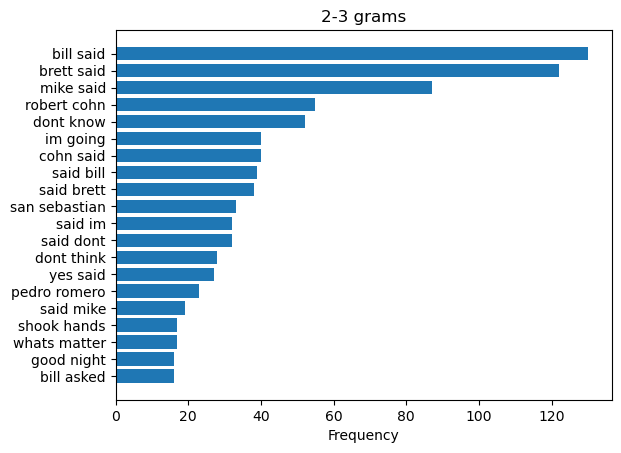

,first,second,frequencies,ratio
6474,bill,said,130,0.004516
1944,brett,said,122,0.004238
7329,mike,said,87,0.003023
46,robert,cohn,55,0.001911
492,dont,know,52,0.001807
1785,im,going,40,0.001390
466,cohn,said,40,0.001390
6628,said,bill,39,0.001355
2008,said,brett,38,0.001320
5411,san,sebastian,33,0.001146


In [63]:
create_plot(2)   # Create plot for bigram 

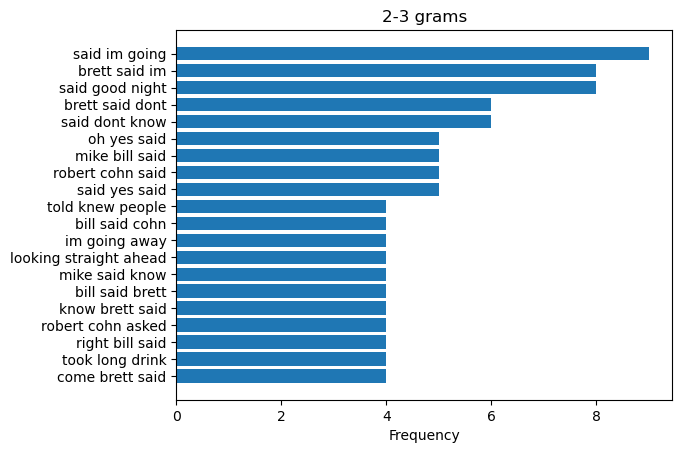

,first,second,third,frequencies,ratio
2708,said,im,going,9,0.000313
2707,brett,said,im,8,0.000278
2285,said,good,night,8,0.000278
14895,brett,said,dont,6,0.000208
2517,said,dont,know,6,0.000208
2771,oh,yes,said,5,0.000174
21085,mike,bill,said,5,0.000174
2157,robert,cohn,said,5,0.000174
1623,said,yes,said,5,0.000174
3397,told,knew,people,4,0.000139


In [64]:
create_plot(3)   # Create plot for trigram

[Back to the TOC](#id0)

<a id="id4"></a>
## Word Embeddings

In [ ]:
### Working with their English pipeline (medium)
nlp = spacy.load("en_core_web_md")
nlp

In [ ]:
SAR_fresh = nlp(text)

In [ ]:
SAR_fresh[920:1000]

In [ ]:
#A truncated quick look at 10% of the vector
print(SAR_fresh[1000].text, SAR_fresh[1000].vector[:30])

In [ ]:
### A quick comparison to see if the word embeddings are actually working
look = SAR_fresh[1000]
like = SAR_fresh[1001]
look.similarity(like)

Let's compare the first and last chapter of the book to see if there is much difference across the novel. It might be that predicting from a model retrained on the last chapters is different from one retrained on the first chapters.

In [ ]:
### Will look at Ch 1 vs Ch 19 for similarities
# Loading the dataset
path1 = 'ch1.txt'
chapter_1 = open(path1).read().lower()

print('The text has {:,} separate items'.format(len(chapter_1)))

In [ ]:
### Will look at Ch 1 vs Ch 19 for similarities
# Loading the dataset
path1 = 'ch19.txt'
chapter_19 = open(path1).read().lower()

print('The text has {:,} separate items'.format(len(chapter_19)))

In [ ]:
print(chapter_1[100:152],"\n", chapter_19[100:152])

In [ ]:
CH1 = nlp(chapter_1)

In [ ]:
CH19 = nlp(chapter_19)

In [ ]:
print("The similarity score between Chapter 1 and Chapter 19 is {}".\
      format(round(CH1.similarity(CH19),2)))

This similarity score between the first and last chapter is quite high considering that the last chapter is almost five times as large as the first chapter. As the similarity score appears to be consistent throughout the novel, we can use any part (or the entire novel) to work towards next word prediction.